In [2]:
import sklearn
print (sklearn.__version__)

0.20.0


In [3]:
#imports
#numpy, pandas, scipy,math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
svc = SVC()

In [4]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()
del rawData ['ID']
rawData.rename(columns = {'default payment next month':'default'}, inplace=True)

In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


variableName = dataframe.iloc[rows,columns]
variableName = dataframe['coumnName']
variableName = dataframe.iloc[:,0:4]

In [6]:
#Select the features
#features
features = rawData.iloc[:,0:23]
print('Summary of feature sample')
#features[0:5]
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
#Select dependent variable
#depVar = rawData['PAY_AMT6']
print('Summary of rawData first 6 rows:')
rawData.iloc[0:5,0:23]

Summary of rawData first 6 rows:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
# Set dependent variable
depVar = rawData['default']
depVar[0:5,]

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

#print(np.cov(rawData))

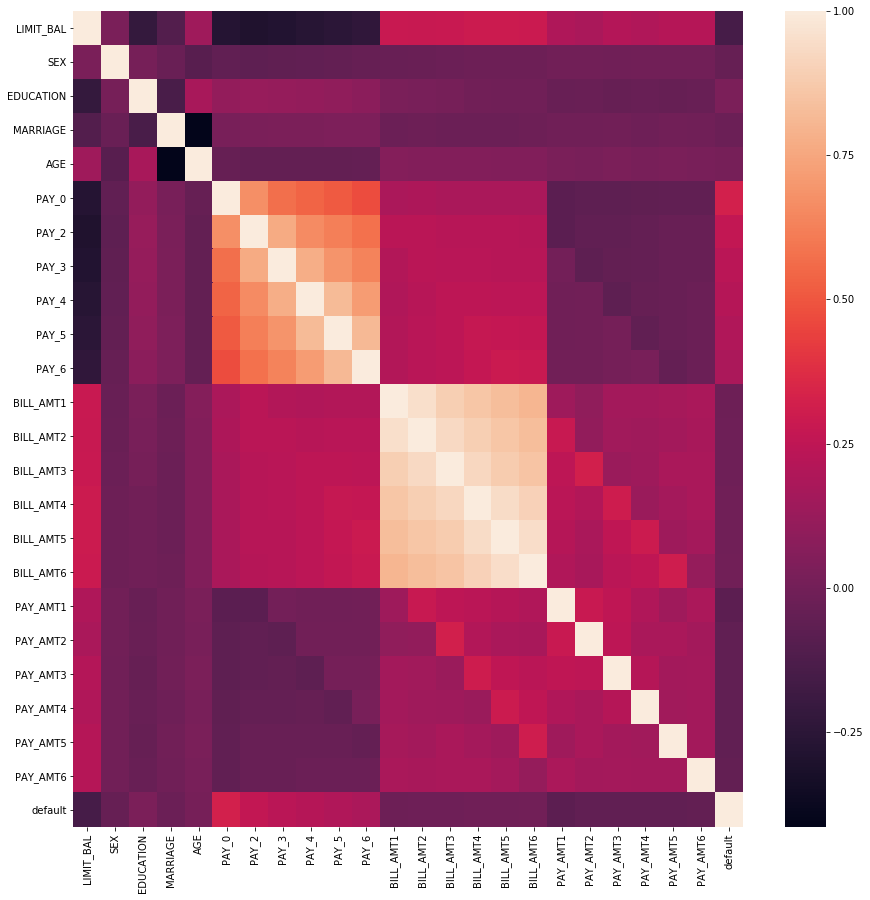

In [10]:
import seaborn as sns
plt.figure(figsize=(15,15)) 
corr = rawData.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

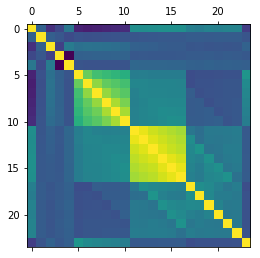

In [11]:
plt.matshow(rawData.corr())

In [12]:
rawData.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [13]:
# See the correlations in descending order
core = rawData.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False).drop_duplicates()

default    default      1.000000
BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT3  BILL_AMT2    0.928326
           BILL_AMT4    0.923969
BILL_AMT4  BILL_AMT6    0.900941
BILL_AMT2  BILL_AMT4    0.892482
BILL_AMT1  BILL_AMT3    0.892279
BILL_AMT3  BILL_AMT5    0.883910
BILL_AMT4  BILL_AMT1    0.860272
BILL_AMT2  BILL_AMT5    0.859778
BILL_AMT3  BILL_AMT6    0.853320
BILL_AMT2  BILL_AMT6    0.831594
BILL_AMT5  BILL_AMT1    0.829779
PAY_4      PAY_5        0.819835
PAY_5      PAY_6        0.816900
BILL_AMT1  BILL_AMT6    0.802650
PAY_4      PAY_3        0.777359
PAY_3      PAY_2        0.766552
PAY_6      PAY_4        0.716449
PAY_5      PAY_3        0.686775
PAY_0      PAY_2        0.672164
PAY_2      PAY_4        0.662067
PAY_6      PAY_3        0.632684
PAY_2      PAY_5        0.622780
           PAY_6        0.575501
PAY_3      PAY_0        0.574245
PAY_4      PAY_0        0.538841
PAY_0      PAY_5        0.509426
          

In [14]:
#Training Set (Feature Space: X Training)
X_train = (features[: 100000])
X_train_count = len(X_train.index)
print('The number of observations in the Y training set are:',str(X_train_count))
X_train.head()

The number of observations in the Y training set are: 30000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [15]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 100000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 30000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [16]:
#Testing Set (X Testing)
X_test = features[-3000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 3000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
27000     110000    1          1         2   30      0      0      0      0   
27001      50000    1          2         1   41      0      0      0      0   
27002      20000    1          2         1   40      0      0      0      0   
27003      16000    1          5         1   46      0      0      0      0   
27004      60000    1          1         2   31      0      0      0      0   

       PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
27000      2    ...         63100      70391      68661      77511      3000   
27001      0    ...          7471       8043      19526       7564      1200   
27002      0    ...          5622      19263      18433      26132      3010   
27003      0    ...         26965      29521      32032      31385      3000   
27004     -2    ...         51400          0          0       

In [17]:
#Ground Truth (y_test) 
y_test = depVar[-3000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 3000


27000    0
27001    0
27002    0
27003    0
27004    0
Name: default, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [19]:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((16875, 23), (5625, 23))

# Build Models

In [21]:
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
svc = SVC()

In [22]:
#Models
modelSVR = SVR()
modelLR = LinearRegression()
modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()
modelGB = GradientBoostingClassifier()
modelLOG = LogisticRegression()
modelSVC = SVC()

In [23]:
model = LinearRegression(n_jobs=10)

In [24]:
#features
#features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [25]:
#dependent variable
#depVar[0:5,]
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64


# Fit Models

In [26]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [28]:
modelKNN.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=3,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=3,
           weights='uniform')

In [39]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelLOG.fit(X_train, y_train)
LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='15', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='15', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelSVC.fit(X_train, y_train)
SVC(C=3.0, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto',
  kernel='rbf', max_iter=4, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SVC(C=3.0, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='rbf',
  max_iter=-4, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelGB.fit(X_train, y_train)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=5.0, tol=0.0005, validation_fraction=0.5,
              verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=5.0, tol=0.0005, validation_fraction=0.5,
              verbose=0, warm_start=False)

In [44]:
#Linear Regression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelLR.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [46]:
 # Random Forest Model Fitting and Scoring
#Model Fitting
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelRF.fit(X_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Model Fitting

In [47]:
 # Random Forest Model Fitting and Scoring
#Model Fitting
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.79612513 0.80213333 0.79960882]


0.9800888888888889

In [48]:
#Support Vector Regression Model Fitting and Scoring
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.01379401 -0.01638215 -0.02006895]


0.9280255215736611

In [49]:
#Linear Regression Model Fitting and Scoring
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.12702647 0.1326631  0.10549273]


0.12782775508548871

In [50]:
# Model fitting - GB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelGB.fit(X_train, y_train)
print(cross_val_score(modelGB, X_train, y_train))
modelGB.score(X_train, y_train)

[0.81443299 0.82346667 0.81614509]


0.8261925925925926

In [51]:
# Model fitting - SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

[0.77835052 0.77795556 0.77702703]


0.9942518518518518

In [54]:
# Model fitting - KNN
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

[0.7536438  0.74506667 0.74573257]


0.8196740740740741

In [55]:
# Model fitting - LOG
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelLOG.fit(X_train, y_train)
print(cross_val_score(modelLOG, X_train, y_train))
modelLOG.score(X_train, y_train)

[0.77657305 0.77688889 0.77613798]


0.7766518518518518

# Predictions

In [56]:
#Make Predictions RF
predictionsRF = modelRF.predict(X_test)
predRsquaredRF = r2_score(y_test,predictionsRF)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquaredRF)
print('RMSE: %.3f' % rmseRF)

R Squared: -0.127
RMSE: 0.436


In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Make predictions - RF
predictionsRF = modelRF.predict(X_test)
predAccuracyRF = accuracy_score(y_test, predictionsRF)
print(classification_report(y_test, predictionsRF))
print('Random Forest Metrics:')
print('Accurancy: %.3f' % predAccuracyRF)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4420
           1       0.60      0.33      0.43      1205

   micro avg       0.81      0.81      0.81      5625
   macro avg       0.72      0.64      0.66      5625
weighted avg       0.79      0.81      0.79      5625

Random Forest Metrics:
Accurancy: 0.810


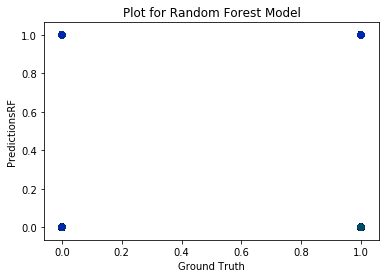

In [58]:
plt.scatter(y_test, predictionsRF, color=['blue','green'], alpha = 0.5)
plt.title('Plot for Random Forest Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsRF')
plt.show();

In [59]:
# Make predictions - GB
predictionsGB = modelGB.predict(X_test)
predAccuracyGB = accuracy_score(y_test, predictionsGB)
print(classification_report(y_test, predictionsGB))
print('GB Metrics:')
print('Accuracy: %.3f' % predAccuracyGB)

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4420
           1       0.66      0.37      0.47      1205

   micro avg       0.82      0.82      0.82      5625
   macro avg       0.75      0.66      0.68      5625
weighted avg       0.81      0.82      0.80      5625

GB Metrics:
Accuracy: 0.824


In [60]:
#Make Predictions GB
predictionsGB = modelGB.predict(X_test)
predRsquaredGB = r2_score(y_test,predictionsGB)
rmseGB = sqrt(mean_squared_error(y_test, predictionsGB))
print('R Squared: %.3f' % predRsquaredGB)
print('RMSE: %.3f' % rmseGB)

R Squared: -0.048
RMSE: 0.420


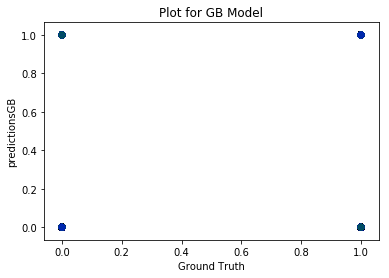

In [61]:
plt.scatter(y_test, predictionsGB, color=['blue','green'], alpha = 0.5)
plt.title('Plot for GB Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsGB')
plt.show();

In [62]:
# Make predictions - SVC
predictionsSVC = modelSVC.predict(X_test)
predAccuracySVC = accuracy_score(y_test, predictionsSVC)
print(classification_report(y_test, predictionsSVC))
print('SVC Metrics:')
print('Accuracy: %.3f' % predAccuracySVC)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4420
           1       0.49      0.01      0.03      1205

   micro avg       0.79      0.79      0.79      5625
   macro avg       0.64      0.51      0.45      5625
weighted avg       0.72      0.79      0.70      5625

SVC Metrics:
Accuracy: 0.786


In [63]:
#Make Predictions SVC
predictionsSVC = modelSVC.predict(X_test)
predRsquaredSVC = r2_score(y_test,predictionsSVC)
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print('R Squared: %.3f' % predRsquaredSVC)
print('RMSE: %.3f' % rmseSVC)

R Squared: -0.274
RMSE: 0.463


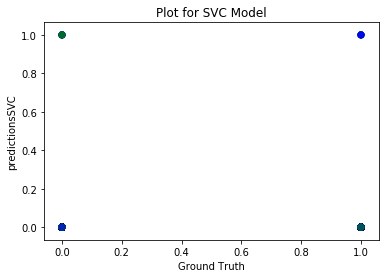

In [64]:
plt.scatter(y_test, predictionsSVC, color=['blue','green'], alpha = 0.5)
plt.title('Plot for SVC Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsSVC')
plt.show();

In [67]:
# Make predictions - LOG
predictionsLOG = modelLOG.predict(X_test)
predAccuracyLOG = accuracy_score(y_test, predictionsLOG)
print(classification_report(y_test, predictionsLOG))
print('LOG Metrics:')
print('Accuracy: %.3f' % predAccuracyLOG)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4420
           1       0.00      0.00      0.00      1205

   micro avg       0.79      0.79      0.79      5625
   macro avg       0.39      0.50      0.44      5625
weighted avg       0.62      0.79      0.69      5625

LOG Metrics:
Accuracy: 0.786


/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
#Make Predictions SVC
predictionsLOG = modelSVC.predict(X_test)
predRsquaredLOG = r2_score(y_test,predictionsLOG)
rmseLOG = sqrt(mean_squared_error(y_test, predictionsLOG))
print('R Squared: %.3f' % predRsquaredLOG)
print('RMSE: %.3f' % rmseLOG)

R Squared: -0.274
RMSE: 0.463


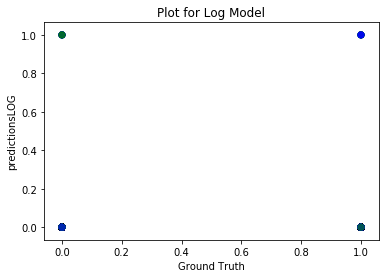

In [69]:
plt.scatter(y_test, predictionsLOG, color=['blue','green'], alpha = 0.5)
plt.title('Plot for Log Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsLOG')
plt.show();

In [75]:
# Make predictions - KNN
predictionsKNN = modelKNN.predict(X_test)
predAccuracyKNN = accuracy_score(y_test, predictionsKNN)
print(classification_report(y_test, predictionsKNN))
print('KNN Metrics:')
print('Accuracy: %.3f' % predAccuracyKNN)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4420
           1       0.36      0.19      0.25      1205

   micro avg       0.75      0.75      0.75      5625
   macro avg       0.58      0.55      0.55      5625
weighted avg       0.71      0.75      0.72      5625

KNN Metrics:
Accuracy: 0.753


In [76]:
#Make Predictions KNN
predictionsKNN = modelKNN.predict(X_test)
predRsquaredKNN = r2_score(y_test,predictionsKNN)
rmseKNN = sqrt(mean_squared_error(y_test, predictionsKNN))
print('R Squared: %.3f' % predRsquaredKNN)
print('RMSE: %.3f' % rmseKNN)

R Squared: -0.469
RMSE: 0.497


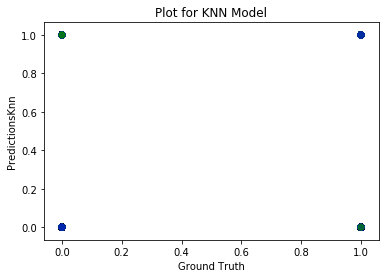

In [77]:
plt.scatter(y_test, predictionsKNN, color=['blue','green'], alpha = 0.5)
plt.title('Plot for KNN Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsKnn')
plt.show();

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [71]:
#Make Predictions LR
predictionsLR = modelLR.predict(X_test)
predRsquaredLR = r2_score(y_test,predictionsLR)
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))
print('R Squared: %.3f' % predRsquaredLR)
print('RMSE: %.3f' % rmseLR)

R Squared: 0.121
RMSE: 0.385


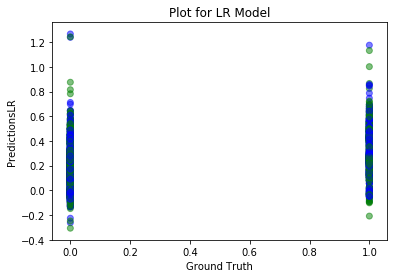

In [72]:
plt.scatter(y_test, predictionsLR, color=['blue','green'], alpha = 0.5)
plt.title('Plot for LR Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsLR')
plt.show();

In [73]:
#Make Predictions SVR
predictionsSVR = modelSVR.predict(X_test)
predRsquaredSVR = r2_score(y_test,predictionsSVR)
rmseSVR = sqrt(mean_squared_error(y_test, predictionsSVR))
print('R Squared: %.3f' % predRsquaredSVR)
print('RMSE: %.3f' % rmseSVR)

R Squared: -0.030
RMSE: 0.416


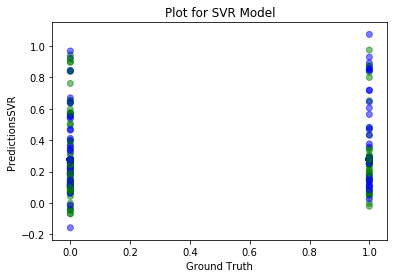

In [74]:
plt.scatter(y_test, predictionsSVR, color=['blue','green'], alpha = 0.5)
plt.title('Plot for SVR Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsSVR')
plt.show();

In [78]:
from sklearn.metrics import cohen_kappa_score
sklearn.metrics.cohen_kappa_score(y_train, y_test, labels=None, weights=None)

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,random_state=0)

NameError: name 'X_train' is not defined

In [4]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)  
y_pred = classifier.fit(X_train, y_train).predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [ ]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()